# Chapter 6. Techniques (about training)

- Momentum : Taking previous updating information to current updates to accelerate the training.

- AdaGrad : Decaying learning rate (parameter-wise decaying) => Largely updated parameters are less changed at the next update.

- Adam : https://arxiv.org/pdf/1412.6980v8.pdf

In [1]:
# Test optimizers with two-variable function f(x,y)

def f(x, y):
    return  0.05 * x**2  + y**2


def df(x, y):
    return 0.1 * x, 2.0 * y

SGD |  -0.052587003065853476 -0.011452833794044649
Momentum |  0.46656567964575635 -0.11897436580308518
AdaGrad |  -0.011144637971135182 5.199430993142131e-28
Adam |  0.5394561688680691 -0.06644632701010487


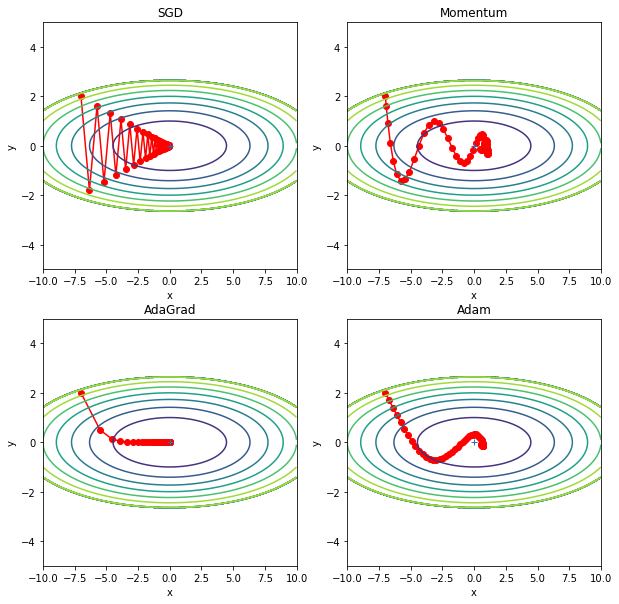

In [2]:
import numpy as np
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

# SGD, Momentum, AdaGrad, Adam
from common.optimizer import *

optimizers = OrderedDict()

optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)


init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

fig, axes = plt.subplots(2, 2, figsize=(10,10))

idx = 0
idy = 0

for key in optimizers.keys():
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(50):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    mask = Z > 7
    Z[mask] = 0

    
    print(key + " | ",x_history[-1], y_history[-1])
    
    
    axes[idx][idy].plot(x_history,y_history,'o-', color="red")
    axes[idx][idy].contour(X, Y, Z)
    axes[idx][idy].set_ylim([-5,5])
    axes[idx][idy].set_xlim([-10,10])
    axes[idx][idy].plot(0,0,'+')
    axes[idx][idy].set_title(key)
    axes[idx][idy].set_xlabel("x")
    axes[idx][idy].set_ylabel("y")
    idy += 1
    if idy == 2:
        idx += 1
        idy = 0
    
#     plt.plot(x_history, y_history, 'o-', color="red")
#     plt.contour(X, Y, Z)
#     plt.ylim(-10, 10)
#     plt.xlim(-10, 10)
#     plt.plot(0, 0, '+')
#     plt.title(key)
#     plt.xlabel("x")
#     plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.3340753246168964
Momentum:2.3897553174887296
AdaGrad:1.984977905155393
Adam:2.1618463692650653
===========iteration:100===========
SGD:1.443246132185151
Momentum:0.2743797272073878
AdaGrad:0.12124600201013967
Adam:0.21542117715160072
===========iteration:200===========
SGD:0.7065606487185099
Momentum:0.2233187756397335
AdaGrad:0.07478764893023736
Adam:0.1371199040151226
===========iteration:300===========
SGD:0.560150933953816
Momentum:0.2613122668051605
AdaGrad:0.12163940835003051
Adam:0.18857086092119088
===========iteration:400===========
SGD:0.3753495663452883
Momentum:0.18663725377440588
AdaGrad:0.05245264057834585
Adam:0.12396754232634548
===========iteration:500===========
SGD:0.34908842510507165
Momentum:0.13881465748770278
AdaGrad:0.04566735290684927
Adam:0.07066039620251949
===========iteration:600===========
SGD:0.3081083302060822
Momentum:0.12251225824756089
AdaGrad:0.05772274696095773
Adam:0.08900268725475834
===========iteration:700

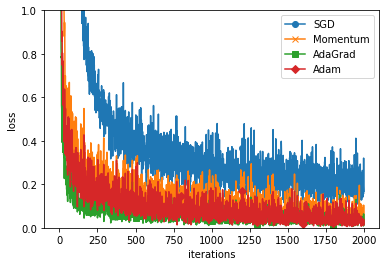

In [3]:
# test with MNIST data

import numpy as np
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.multi_layer_net import MultiLayerNet

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,normalize=True,one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 128
max_iter = 2000

# Load optimizer

optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []
    
for i in range(max_iter):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].grad(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))
            
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iter)
for key in optimizers.keys():
    plt.plot(x, train_loss[key], marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

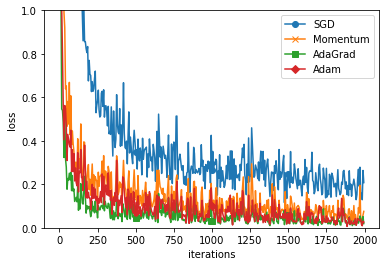

In [5]:
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iter)
for key in optimizers.keys():
    plt.plot(x[::5], train_loss[key][::5], marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()